# Regressão logística

Nesta aula, iremos trabalhar com o DataSet do Titanic.

Vamos tentar montar um algoritmo de classificação, Sobrevivente ou Falecido, utilizando a regressão logística no Python.

Usaremos uma versão "semi-limpa" do DataSet do Titanic.

## Importar bibliotecas
Vamos importar algumas bibliotecas para começar!

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Os dados

Leitura e importação do ficheiro titanic_train.csv para um pandas DataFrame.

In [23]:
train = pd.read_csv('titanic_train.csv')

In [24]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Análise exploratória dos dados

Vamos começar por efetuar uma análise exploratória de dados, verificando os dados que faltam! Por exemplo, no campo "Cabin" existem dados NaN, ou seja, não se conhece o valor.

## Dados ausentes

Podemos usar a seaborn para criar um mapa de calor (HEATMAP - https://seaborn.pydata.org/generated/seaborn.heatmap.html) simples para visualizar a perda de dados!

O método isnull() do pandas, irá retornar True quando o valor é Null e False quando não é Null.

<Axes: >

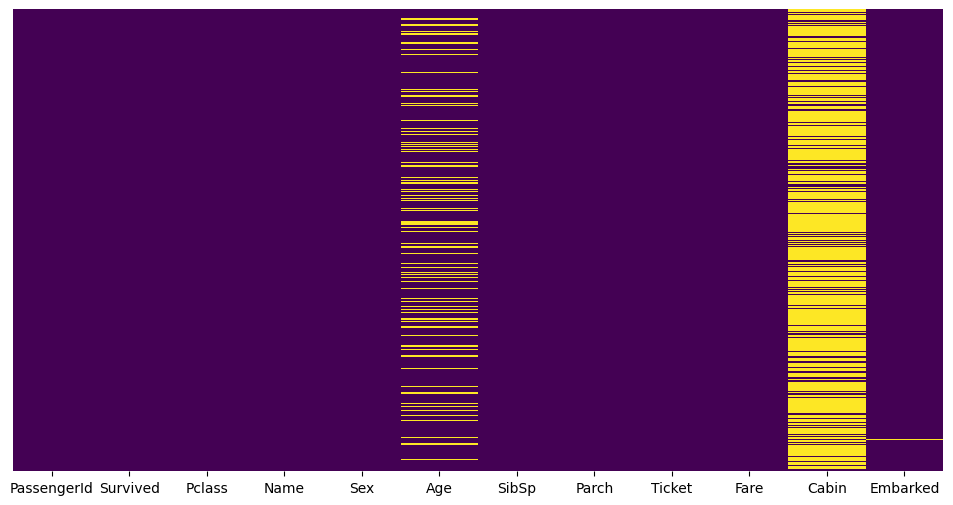

In [26]:
plt.figure(figsize=(12, 6))
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

Constata-se que existem dados em falta, relativamente a Age, Cabin e Embarked. A proporção de Age em falta é pequena, contudo, perdemos muitos dados relativamente a Cabin.

In [ ]:
# Podemos usar a seaborn para criar um COUNTPLOT - https://seaborn.pydata.org/generated/seaborn.countplot.html?highlight=countplot

#O COUNTPLOT irá mostrar a contagem das observações para a categoria Survived utilizando barras.

<Axes: xlabel='Survived', ylabel='count'>

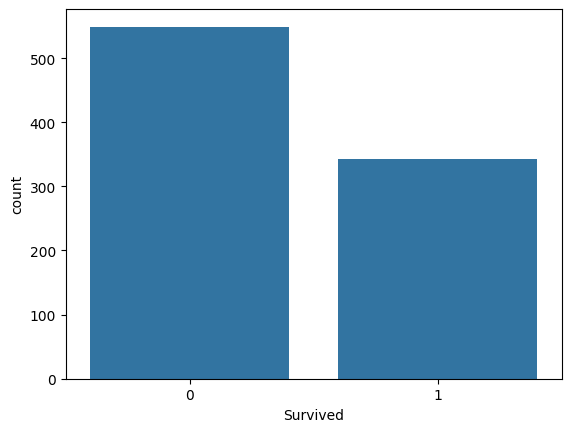

In [27]:
sns.countplot(x = 'Survived', data = train)

<Axes: xlabel='Survived', ylabel='count'>

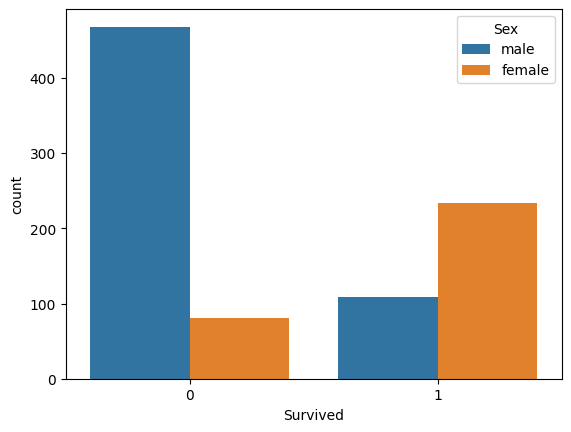

In [28]:
sns.countplot(x = 'Survived', hue = 'Sex', data = train)

<Axes: xlabel='Survived', ylabel='count'>

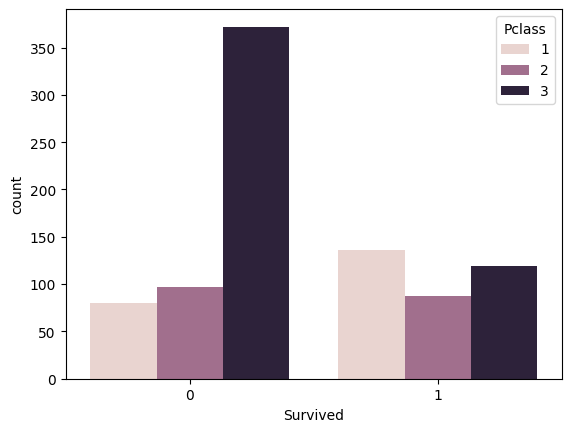

In [29]:
sns.countplot(x = 'Survived', hue = 'Pclass', data = train)

Text(0.5, 0, 'Age')

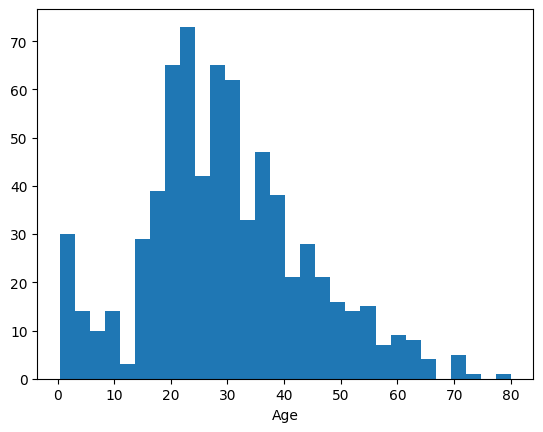

In [30]:
plt.hist(train['Age'], bins=30)
plt.xlabel("Age")

<Axes: xlabel='SibSp', ylabel='count'>

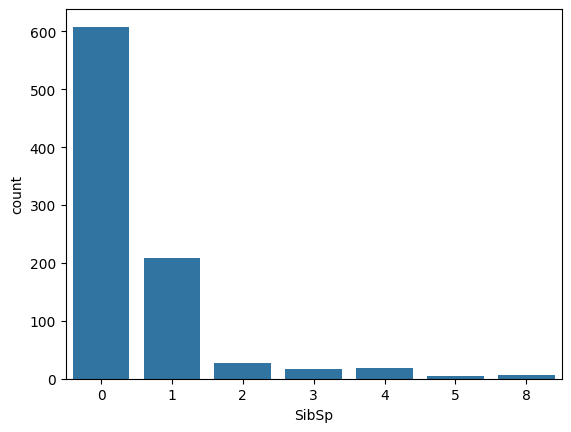

In [31]:
sns.countplot(x = 'SibSp', data = train)

Text(0.5, 0, 'Fare')

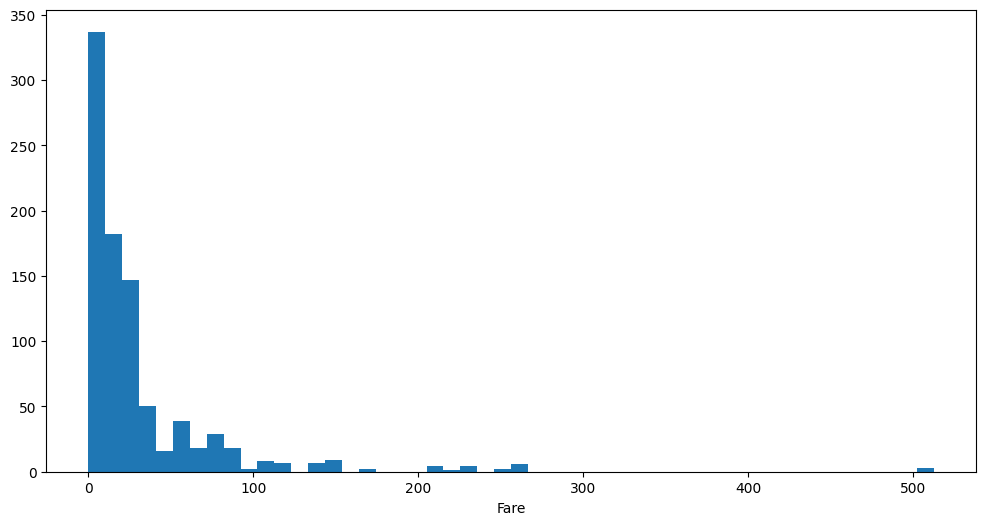

In [32]:
plt.figure(figsize=(12, 6))
plt.hist(train['Fare'], bins=50)
plt.xlabel("Fare")

___
## Limpar os dados

Queremos preencher os dados das idades em falta, em vez de simplesmente apagar as linhas de dados das idades que faltam. 
Uma maneira de fazer isto, será preencher com a idade média de todos os passageiros.
No entanto, podemos ser mais inteligentes e verificar a idade média através da classe de passageiros. Por exemplo:


<Axes: xlabel='Pclass', ylabel='Age'>

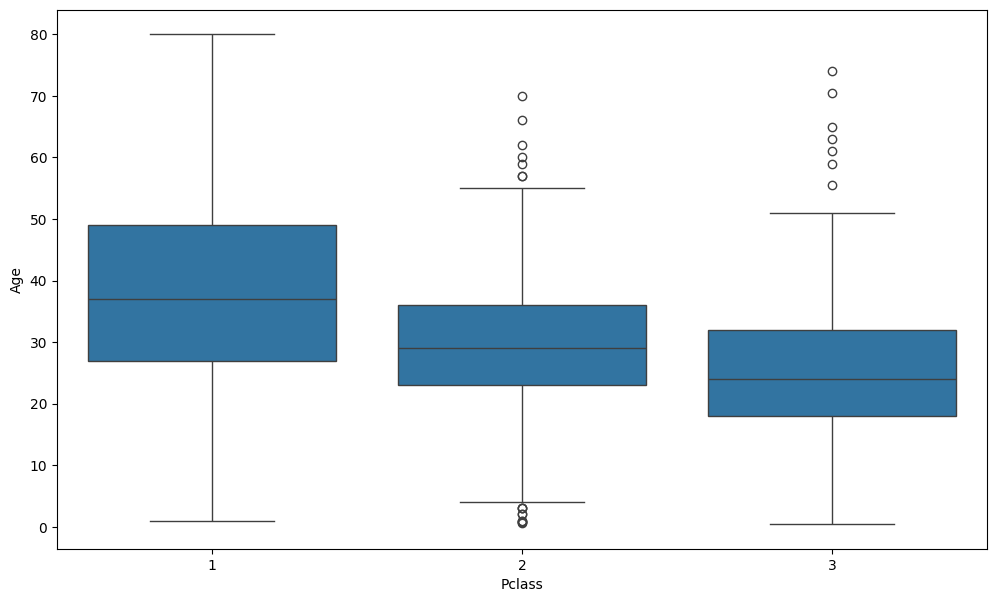

In [33]:
plt.figure(figsize=(12, 7))
sns.boxplot(x = 'Pclass', y = 'Age', data = train)

Podemos verificar que os passageiros mais ricos (que estão nas classes superiores) tendem a ser mais velhos, o que faz sentido. Usaremos os valores da idade média para preenchimento de Age, com base em Pclass.

In [34]:
def input_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

Aplicação da função!

Método apply() - https://pandas.pydata.org/pandas-docs/version/0.25.0/reference/api/pandas.DataFrame.apply.html

In [35]:
train['Age'] = train[['Age','Pclass']].apply(input_age, axis = 1)

/var/folders/b4/n_n0cqjd76qcq_wtp0s9z5dm0000gq/T/ipykernel_64611/2794736852.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
/var/folders/b4/n_n0cqjd76qcq_wtp0s9z5dm0000gq/T/ipykernel_64611/2794736852.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


Verificação do HEATMAP

<Axes: >

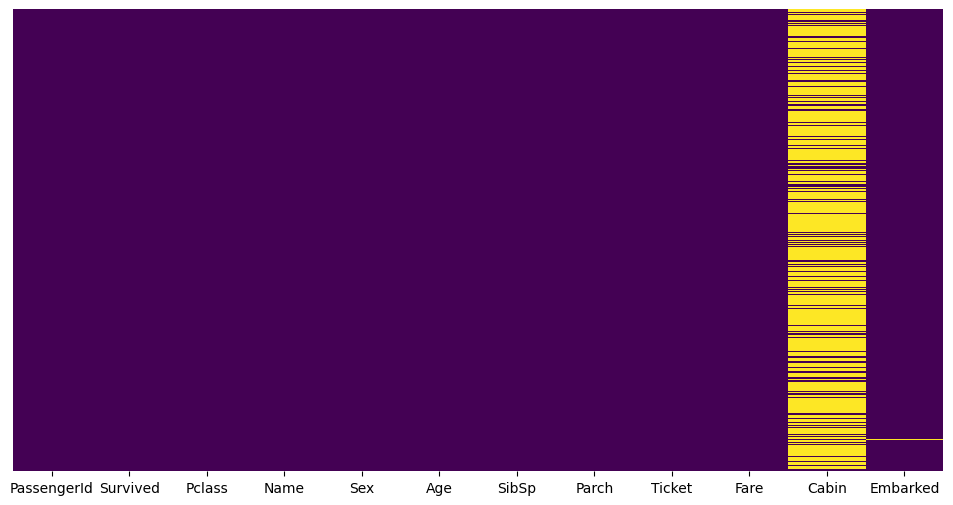

In [36]:
plt.figure(figsize=(12, 6))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Apagar a coluna Cabin e a linha em Embarked.

In [37]:
del train['Cabin']

In [38]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Quais os registos incompletos?

In [39]:
train[train.isna().any(axis=1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


O Método dropna apaga linhas que contêm qualquer tipo de informação falsa.

In [41]:
train.dropna(inplace=True)

<Axes: >

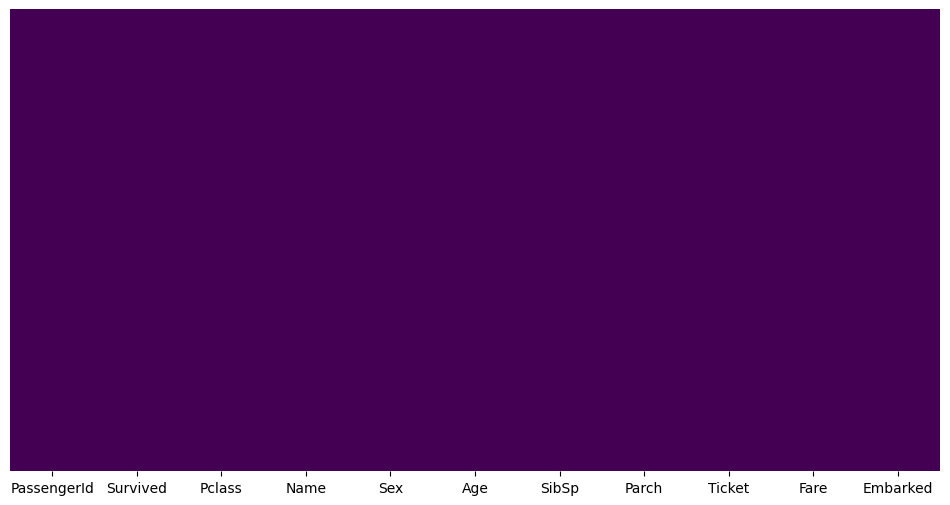

In [42]:
plt.figure(figsize=(12, 6))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

## Converter recursos categóricos

Existe a necessidade de converter os dados categóricos em variáveis dummy, usando o pandas! Caso contrário, o algoritmo de Machine Learning não será capaz de aceitar estas variáveis como entradas, diretamente.

In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


O Método get_dummies() irá converter para números os dados categóricos de determinadas variáveis, nomeadamente Sex e Embarked.
O parâmetro drop_first irá eliminar a primeira coluna, para não criar constrangimentos ao modelo.

In [44]:
pd.get_dummies(train['Sex'])

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
886,False,True
887,True,False
888,True,False
889,False,True


In [45]:
sex = pd.get_dummies(train['Sex'], drop_first = True)
embark = pd.get_dummies(train['Embarked'], drop_first = True)

In [46]:
sex

,male
0,True
1,False
2,False
3,False
4,True
...,...
886,True
887,False
888,False
889,True


In [47]:
embark

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True
...,...,...
886,False,True
887,False,True
888,False,True
889,False,False


In [48]:
train.drop(['Sex', 'PassengerId','Embarked','Name','Ticket'], axis = 1, inplace = True)

In [49]:
train = pd.concat([train, sex, embark], axis = 1)

In [50]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


Os dados estão prontos para o modelo

# Construir o modelo de Regressão Logística

Vamos começar por dividir os dados num conjunto de treino e num conjunto de testes (existe outro ficheiro test.csv que pode ser utilizado, caso se pretendam utilizar todos os dados).

## Divisão treino-teste

In [51]:
from sklearn.model_selection import train_test_split

In [53]:
X = train[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S']]
Y = train['Survived']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 101)

## Training and Predicting

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# logmodel = LogisticRegression()
logmodel = LogisticRegression(max_iter=1000)
#logmodel = LogisticRegression(random_state=0, multi_class='ovr', penalty='l2', solver='liblinear', max_iter=1000)

Solução do erro no fit - 
https://www.codegrepper.com/code-examples/python/how+to+increase+max_iter+in+logistic+regression

In [57]:
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [58]:
predictions = logmodel.predict(X_test)

Vamos seguir em frente para avaliar o modelo!

## Avaliação

Podemos verificar a precisão usando o relatório de classificação! Ou então a Matriz, tal como nos slides da aula.

In [59]:
from sklearn.metrics import classification_report

In [60]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.85      0.69      0.76       104

    accuracy                           0.83       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267



In [61]:
from sklearn.metrics import confusion_matrix

In [62]:
print(confusion_matrix(y_test,predictions))

[[150  13]
 [ 32  72]]


In [63]:
mat = confusion_matrix(y_test,predictions)
tx_ok=mat[0][0]+mat[1][1]
tx_nok=mat[1][0]+mat[0][1]
print("Tx sucesso:", tx_ok/(tx_ok+tx_nok), ", Tx insucesso:", tx_nok/(tx_ok+tx_nok))

Tx sucesso: 0.8314606741573034 , Tx insucesso: 0.16853932584269662


## Testing the new sample

## Os dados

Leitura e importação do ficheiro titanic_test.csv para um pandas DataFrame.

In [ ]:
test_titanic = pd.read_csv('titanic_test.csv')

In [ ]:
test_titanic.head()

# Análise exploratória dos dados

Vamos começar por efetuar uma análise exploratória de dados, verificando os dados que faltam! Por exemplo, no campo "Cabin" existem dados NaN, ou seja, não se conhece o valor.

## Dados ausentes

Mapa de calor para visualizar a perda de dados!
isnull() do pandas para detetar campos não preenchidos.

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(test_titanic.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

Constata-se que existem dados em falta, relativamente a Age, Cabin e Fare. A proporção de Age em falta é pequena, contudo, perdemos muitos dados relativamente a Cabin.

___
## Limpar os dados

Vamos usar a mesma estratégia de correção/limpeza da amostra de treino.

Preenchimento das idades em falta

In [ ]:
test_titanic['Age'] = test_titanic[['Age','Pclass']].apply(input_age, axis = 1)

Apagar a coluna Cabin e a linhas com colunas não preenchidas.

In [ ]:
del test_titanic['Cabin']

In [ ]:
test_titanic.head()

Registos incompletos?

In [ ]:
test_titanic[test_titanic.isna().any(axis=1)]

Clear Fare NaN number

In [ ]:
test_titanic['Fare'] = test_titanic['Fare'].fillna(0)

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(test_titanic.isnull(), yticklabels=False, cbar=False, cmap='viridis')

All done.

## Converter recursos categóricos

Existe a necessidade de converter os dados categóricos em variáveis dummy, usando o pandas! Caso contrário, o algoritmo de Machine Learning não será capaz de aceitar estas variáveis como entradas, diretamente.

In [ ]:
test_sex = pd.get_dummies(test_titanic['Sex'], drop_first = True)
test_embark = pd.get_dummies(test_titanic['Embarked'], drop_first = True)

In [ ]:
test_sex

In [ ]:
test_embark

In [ ]:
test_titanic.drop(['Sex', 'PassengerId','Embarked','Name','Ticket'], axis = 1, inplace = True)

In [ ]:
test_titanic = pd.concat([test_titanic, test_sex, test_embark], axis = 1)

Add the new Survived column

In [ ]:
test_titanic.insert(0,'Survived',0)

In [ ]:
test_titanic.head()

Os dados estão prontos para o modelo

## Novas previsões

In [ ]:
test_titanic_X = test_titanic[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S']]

In [ ]:
test_predictions = logmodel.predict(test_titanic_X)

## Avaliação dos resultados

In [ ]:
test_predictions

Update the Dataframe

In [ ]:
test_titanic['Survived'] = test_predictions

In [ ]:
test_titanic.head()

In [ ]:
test_titanic.describe()

Write resulta to Excel file

In [ ]:
# dependecies pip install openpyxl
# create excel writer object
writer = pd.ExcelWriter('titanic_test_results.xlsx')
# write dataframe to excel
test_titanic.to_excel(writer)
# save the excel
writer.save()